# Lista de interpolação

* Aluno : Gabriel Wendell Celestino Rocha
* Matrícula :  20190112149 

* Disciplina : Física Computacional II
* Professor : Leonardo Machado
* Data de Entrega : 09/04/2021

In [1]:
import matplotlib.pyplot as plt
import scipy.interpolate as sp
import pandas as pd
import numpy as np

%matplotlib notebook

## Interpolação usando o `scipy.interpolate`

### Letra a)

Vamos ler os dados presentes no arquivo `scattering.data` usando a biblioteca `Pandas` do Python:

In [2]:
scattering = pd.read_csv('scattering.data', sep='\s+', header=None)
scattering

,0,1,2
0,0,10.60,9.34
1,25,16.00,17.90
2,50,45.00,41.50
3,75,83.50,85.50
4,100,52.80,51.50
5,125,19.90,21.50
6,150,10.80,10.80
7,170,8.25,6.29
8,200,4.70,4.14


Vamos ler os dados usando o `Numpy` também (apesar de que não iremos usar essa versão dos dados):

In [3]:
scattering_ = np.loadtxt('scattering.data')
scattering_

array([[  0.  ,  10.6 ,   9.34],
       [ 25.  ,  16.  ,  17.9 ],
       [ 50.  ,  45.  ,  41.5 ],
       [ 75.  ,  83.5 ,  85.5 ],
       [100.  ,  52.8 ,  51.5 ],
       [125.  ,  19.9 ,  21.5 ],
       [150.  ,  10.8 ,  10.8 ],
       [170.  ,   8.25,   6.29],
       [200.  ,   4.7 ,   4.14]])

### Letra b)

Vamos gerar uma função interpoladora linear usando a biblioteca do `scipy.interpolate` com os dados fornecidos:

In [4]:
f = sp.interp1d(scattering[0], scattering[1])

### Letra c)

Vamos gerar valores que iremos interpolar posteriormente. Precisamos realizar esse passo pelo fato de que o comando `interp1d` gera apenas uma função. Dessa forma, precisamos fornecer os valores de $x$ para nossa função interpoladora linear:

In [5]:
x = np.linspace(0, 200, num=41, endpoint=True)
x

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
       110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
       165., 170., 175., 180., 185., 190., 195., 200.])

Vamos agora interpolar os valores de `x` usando nossa função interpoladora linear:

In [6]:
f_1d = f(x)
f_1d

array([10.6       , 11.68      , 12.76      , 13.84      , 14.92      ,
       16.        , 21.8       , 27.6       , 33.4       , 39.2       ,
       45.        , 52.7       , 60.4       , 68.1       , 75.8       ,
       83.5       , 77.36      , 71.22      , 65.08      , 58.94      ,
       52.8       , 46.22      , 39.64      , 33.06      , 26.48      ,
       19.9       , 18.08      , 16.26      , 14.44      , 12.62      ,
       10.8       , 10.1625    ,  9.525     ,  8.8875    ,  8.25      ,
        7.65833333,  7.06666667,  6.475     ,  5.88333333,  5.29166667,
        4.7       ])

Como de costume, vamos definir uma função para melhorar a estética dos plots:

In [7]:
def opt_plot():
    plt.grid(True, linestyle=":", color='0.50')
    plt.minorticks_on()
    plt.tick_params(axis='both', which='minor', direction='in', top=True, right=True, length=5, width=1, labelsize=15)
    plt.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=8, width=1, labelsize=15)

Agora vamos plotar os dados contidos no arquivo `scattering.data` juntamente com a nossa função interpoladora linear:

<IPython.core.display.Javascript object>


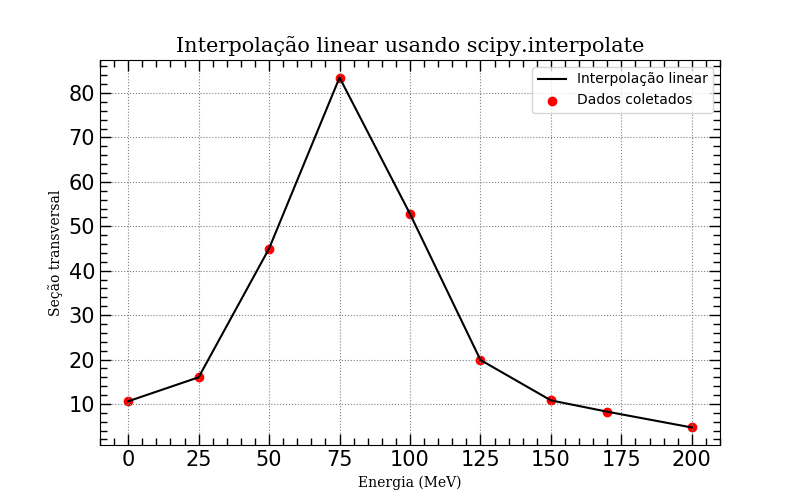

In [8]:
plt.figure(figsize=(8,5))

plt.scatter(scattering[0], scattering[1], color='red', label='Dados coletados')
plt.plot(x,f_1d, color='black', label='Interpolação linear')
plt.title('Interpolação linear usando scipy.interpolate', family='serif', fontsize=15)
plt.xlabel('Energia (MeV)', family='serif', fontsize=10)
plt.ylabel('Seção transversal', family='serif', fontsize=10)
plt.legend(loc='best')
opt_plot()

### Letra d)

Vamos agora modificar nossa função para realizar uma interpolação usando um spline cúbico. Para isso, basta realizarmos o mesmo procedimento feito no item anterior, potrém especificamos que o nosso spline será cúbico:

In [9]:
f_cubic = sp.interp1d(scattering[0], scattering[1], kind='cubic')
f_1dcubic = f_cubic(x)

f_1dcubic

array([10.6       , 10.47447798, 10.83797065, 11.80422432, 13.48698532,
       16.        , 19.45701468, 23.97177568, 29.65802935, 36.62952202,
       45.        , 54.65666331, 64.58052662, 73.52605827, 80.24772662,
       83.5       , 82.42673209, 77.72931785, 70.49853756, 61.82517152,
       52.8       , 44.34840833, 36.73420198, 30.05579147, 24.41158731,
       19.9       , 16.56363459, 14.22187422, 12.63829655, 11.57647925,
       10.8       , 10.11042057,  9.46123919,  8.84393822,  8.25      ,
        7.67090688,  7.09814121,  6.52318534,  5.93752162,  5.33263239,
        4.7       ])

Agora vamos plotar os dados originais juntamente com a interpolação usando spline cúbico:

<IPython.core.display.Javascript object>


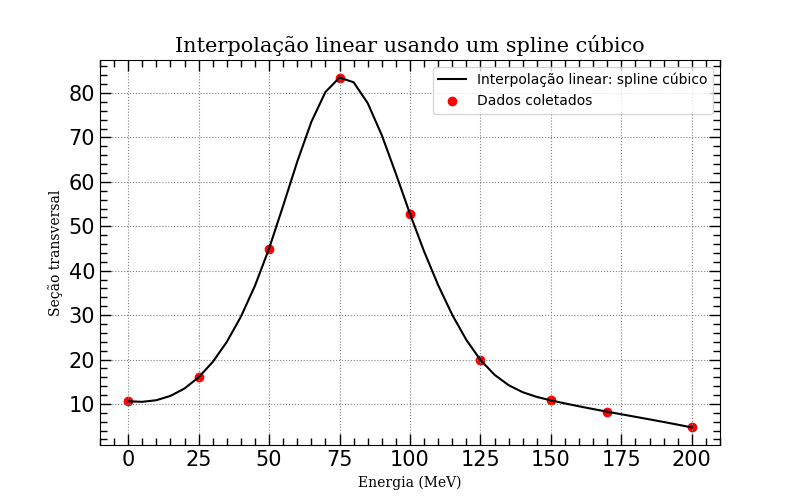

In [10]:
plt.figure(figsize=(8,5))

plt.scatter(scattering[0], scattering[1], color='red', label='Dados coletados')
plt.plot(x,f_1dcubic, color='black', label='Interpolação linear: spline cúbico')
plt.title('Interpolação linear usando um spline cúbico', family='serif', fontsize=15)
plt.xlabel('Energia (MeV)', family='serif', fontsize=10)
plt.ylabel('Seção transversal', family='serif', fontsize=10)
plt.legend(loc='best')
opt_plot()

## Interpolação linear

### Letra a)

Vamos definir uma função que gera um polinômio interpolador linear baseado na seguinte fórmula:

$$\boxed{f(x)=\frac{f(a)(b-x)+f(b)(x-a)}{b-a}}$$

In [11]:
def interp_lin(f,x): 
    N = 1
    a = 0
    b = 0
    x_ = np.arange(x[0],x[len(x)-1]+1/N, 1/N)
    f_ = np.zeros(len(x_), float) 
    
    for i in range(1,len(x)):
        a_ = np.where(abs(x_-x[i-1]) < 1e-2) 
        b_ = np.where(abs(x_-x[i]) < 1e-2)   
        
        if len(a_) == 1:
            index_a = int(a_[0])
        else:
            index_a = int(a_[a])
            a += 1
        
        if len(b_) == 1:
            index_b = int(b_[0])
        else:
            index_b = int(b_[b])
            b += 1
            
        
        j = index_a
        
        while j <= index_b:
            f_[j] = (f[i-1]*(x[i] - x_[j]) + f[i]*(x_[j] - x[i-1])) / (x[i] - x[i-1])
            j += 1
            
    return f_

### Letra b)

Agora vamos usar nossa função para gerar um gráfico similar ao obtido no item anterior. Primeiramente aplicamos a nossa função de interpolação linear nos dados:

In [12]:
f_inter_lin = interp_lin(np.array(scattering[1]), np.array(scattering[0]))

Por fim, vamos ao plot:

<IPython.core.display.Javascript object>


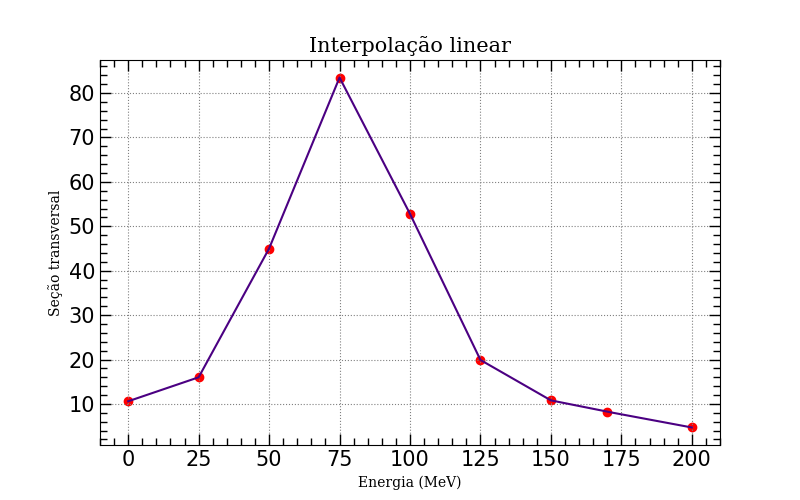

In [13]:
plt.figure(figsize=(8,5))

plt.scatter(scattering[0],scattering[1], color='red')
plt.plot(f_inter_lin, color='indigo')
plt.title('Interpolação linear', family='serif', fontsize=15)
plt.xlabel('Energia (MeV)', family='serif', fontsize=10)
plt.ylabel('Seção transversal', family='serif', fontsize=10)
opt_plot()

## Polinômio interpolador de Lagrange

### Letra a)

Analogamente ao que foi feito no problema anterior, vamos definir uma função para implementar o polinômio interpolador de Lagrange de ordem $n$ baseado na seguinte fórmula:

$$g(x)\approx \sum_{i=1}^{n}g_{i}\lambda_{i}(x)=g_{1}\lambda_{1}(x)+g_{2}\lambda_{2}(x)+\ldots+g_{n}\lambda_{n}(x)$$

onde temos a relação

$$\boxed{\lambda_{i}(x)=\prod_{j(\neq i)=1}^{n}\frac{x-x_{j}}{x_{i}-x_{j}}=\frac{x-x_{1}}{x_{i}-x_{1}}\cdot\frac{x-x_{2}}{x_{i}-x_{2}}\cdots\frac{x-x_{n}}{x_{i}-x_{n}}}$$

In [14]:
def interp_Lagrange_8(g, x):
    N = len(g)
    n = 1
    x_ = np.arange(x[0],x[N-1]+1/n,1/n)
    
    def lambda_(t):
        lambda_i = np.ones(N, float)
        for i in range(N):
            for j in range(N):
                if x[i] != x[j]:
                    lambda_i[i] *= (t - x[j])/(x[i] - x[j])
                else:
                    pass
        return lambda_i
    
    g_ = lambda t: np.dot(g,lambda_(t))
    G = []
    for i in range(len(x_)):
        G.append(g_(x_[i]))
    
    return G

### Letra b)

Vamos agora usar nossa função para tentar gerar um gráfico dos dados interpolados. Começamos interpolando nossos dados:

In [15]:
f_interp_Lagrange_8 = interp_Lagrange_8(np.array(scattering[1]), np.array(scattering[0]))

Por fim, vamos ao plot:

<IPython.core.display.Javascript object>


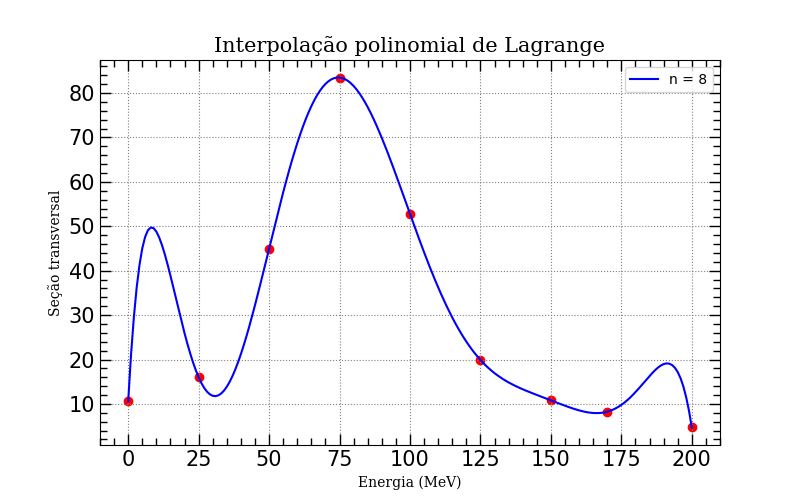

In [16]:
plt.figure(figsize=(8,5))

plt.scatter(scattering[0],scattering[1], color='red')
plt.plot(f_interp_Lagrange_8, color='blue', label='n = 8')
plt.title('Interpolação polinomial de Lagrange', family='serif', fontsize=15)
plt.xlabel('Energia (MeV)', family='serif', fontsize=10)
plt.ylabel('Seção transversal', family='serif', fontsize=10)
plt.legend(loc='best')
opt_plot()

### Letra c)

Vamos adaptar a nossa função `interp_Lagrange_8` para gerar uma sequência de polinômios interpoladores de Lagrange de ordem $n=2$. Começamos definindo uma função que gera uma sequência de polinômios interpoladores de Lagrange:

In [17]:
def interp_Lagrange(g, x):
    N = len(g)
    n = 1
    x_ = np.arange(x[0],x[N-1]+1/n,1/n)
    
    def lambda_(t):
        lambda_i = np.ones(N, float)
        for i in range(N):
            for j in range(N): 
                if x[i] != x[j]:
                    lambda_i[i] *= (t - x[j])/(x[i] - x[j])
                else:
                    pass
        return lambda_i
    
    g_ = lambda t: np.dot(g,lambda_(t))
    
    return g_

Agora definimos nossa função interpoladora de Lagrange de ordem $n=2$:

In [18]:
def interp_Lagrange_2(f,x): 
    N = 1
    a = 0
    b = 0
    x_ = np.arange(x[0],x[len(x)-1]+1/N, 1/N)
    f_ = np.zeros(len(x_), float)
    
    i = 2
    while i < len(x):
        a_ = np.where(abs(x_-x[i-2]) < 1e-1) 
        b_ = np.where(abs(x_-x[i]) < 1e-1)   
        
        if len(a_) == 1:
            index_a = int(a_[0])
        else:
            index_a = int(a_[a])
            a += 1
        
        if len(b_) == 1:
            index_b = int(b_[0])
        else:
            index_b = int(b_[b])
            b += 1
        
        j = index_a
        
        while j < index_b:
            f_[j] = interp_Lagrange([f[i-2],f[i-1],f[i]], [x[i-2], x[i-1], x[i]])(x_[j])
            j += 1
        f_[index_b] = interp_Lagrange([f[i-2],f[i-1],f[i]], [x[i-2], x[i-1], x[i]])(x_[index_b])
        i += 2 
        
    return f_

Agora interpolamos nossos dados:

In [19]:
f_interp_Lagrange_2 = interp_Lagrange_2(np.array(scattering[1]), np.array(scattering[0]))

Finalmente, vamos ao plot final:

<IPython.core.display.Javascript object>


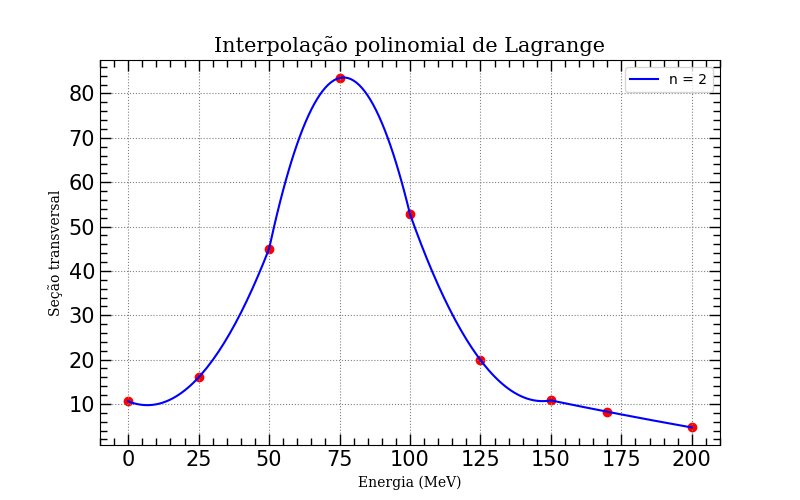

In [20]:
plt.figure(figsize=(8,5))

plt.scatter(scattering[0],scattering[1], color='red')
plt.plot(f_interp_Lagrange_2, color='blue', label='n = 2')
plt.title('Interpolação polinomial de Lagrange', family='serif', fontsize=15)
plt.xlabel('Energia (MeV)', family='serif', fontsize=10)
plt.ylabel('Seção transversal', family='serif', fontsize=10)
plt.legend(loc='best')
opt_plot()

$\blacksquare$